In [21]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from kmodes.kmodes import KModes
from openpyxl import Workbook

In [6]:
#Initialise repositories
_projroot = os.path.abspath('.')
_datadir = os.path.join(_projroot, 'data')
_preprocesseddir = os.path.join(_datadir, 'preprocesseddata')
_experimentdir = os.path.join(_datadir, 'experiments')
_rawdir = os.path.join(_datadir, 'rawdata')
_src = os.path.join(_projroot,'src')
_sampling = os.path.join(_experimentdir,'sampling')
_geodata = os.path.join(_datadir,'geodata')

In [7]:
df_places = gpd.read_file(os.path.join(_geodata, 'Output_Areas.geojson'))

In [8]:
Ofcom = pd.read_csv(os.path.join(_preprocesseddir,'Ofcom_Combine.csv'))
Ofcom['Postcode'].astype(str)
print(Ofcom)

      Unnamed: 0 Postcode PC_Area  Target  Large User  Total households  \
0              0   NW14HB      NW       0           0                 8   
1              1   NW14LJ      NW       0           0                 9   
2              2   NW14NR      NW       1           0                 1   
3              3   NW14NT      NW       1           0                 2   
4              4   NW14NX      NW       1           0                 4   
...          ...      ...     ...     ...         ...               ...   
7850        7850  WC2R1BF      WC       0           0                 1   
7851        7851  WC2R3AA      WC       0           0                 1   
7852        7852  WC2R3AT      WC       0           0                 9   
7853        7853  WC2R3JE      WC       0           0                 1   
7854        7854  SW1X9HF      SW       1           0                14   

      Population aged 65+  Females  Females aged 65-69  Females aged 65+  ...  \
0                 

In [9]:
Postcode_OA = pd.read_csv(os.path.join(_geodata,'postcode_OA.csv'))
Postcode_OA['Postcode'].astype(str)

0        NW13AU
1        NW14HB
2        NW14LJ
3        NW14LL
4        NW14NR
         ...   
7850    WC2R3DX
7851    WC2R3JE
7852    WC2R3JJ
7853    WC2R3LD
7854    WC2R3LL
Name: Postcode, Length: 7855, dtype: object

In [10]:
Ofcom = Ofcom.merge(Postcode_OA, on=['Postcode'], how = 'outer')

In [11]:
Ofcom = Ofcom.drop(['Unnamed: 0_x','Unnamed: 0_y', 'PC_Area'], axis =1)

print(Ofcom)

     Postcode  Target  Large User  Total households  Population aged 65+  \
0      NW14HB       0           0                 8                    4   
1      NW14LJ       0           0                 9                    7   
2      NW14NR       1           0                 1                    0   
3      NW14NT       1           0                 2                    0   
4      NW14NX       1           0                 4                    0   
...       ...     ...         ...               ...                  ...   
7850  WC2R1BF       0           0                 1                    0   
7851  WC2R3AA       0           0                 1                    0   
7852  WC2R3AT       0           0                 9                    1   
7853  WC2R3JE       0           0                 1                    0   
7854  SW1X9HF       1           0                14                    3   

      Females  Females aged 65-69  Females aged 65+  Females aged 70-74  \
0          1

In [12]:
cont = list(set(list(Ofcom.select_dtypes(exclude=['object']).columns))-set(['Target']))
maxi = Ofcom[cont].max()
print(maxi)
Ofcom_norm = Ofcom
Ofcom_norm[cont] = Ofcom[cont]/maxi
print(Ofcom)
        

Females aged 100+             1.0000
Males aged 80-84              6.0000
Mode Income              110000.0000
Females aged 75-79            9.0000
Median Income             85000.0000
Population aged 65+          72.0000
Males aged 100+               1.0000
Females                     162.0000
Females aged 85-89            6.0000
Females aged 95_99            2.0000
Females aged 80-84            7.0000
Females aged 90-94            3.0000
Males                       153.0000
Males aged 90-94              9.0000
Males aged under 25          55.0000
Males aged 65-69              8.0000
Females aged 25-44           80.0000
Females aged under 25        52.0000
Females aged 45-65           40.0000
Males aged 65+               32.0000
Mean Income               93700.0000
Males aged 70-74              9.0000
Females aged 70-74           12.0000
Females aged 65-69           14.0000
Large User                    1.0000
Females aged 65+             40.0000
Total households            162.0000
M

In [13]:
km = KModes(n_clusters=5, init='Huang', n_init=10, verbose=1)

clusters = km.fit_predict(Ofcom_norm)

# Print the cluster centroids
print(clusters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2112, cost: 114677.0
Run 1, iteration: 2/100, moves: 663, cost: 114245.0
Run 1, iteration: 3/100, moves: 148, cost: 114228.0
Run 1, iteration: 4/100, moves: 3, cost: 114228.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2812, cost: 116639.0
Run 2, iteration: 2/100, moves: 786, cost: 116499.0
Run 2, iteration: 3/100, moves: 74, cost: 116494.0
Run 2, iteration: 4/100, moves: 7, cost: 116494.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2534, cost: 116036.0
Run 3, iteration: 2/100, moves: 1265, cost: 115534.0
Run 3, iteration: 3/100, moves: 295, cost: 115507.0
Run 3, iteration: 4/100, moves: 23, cost: 115507.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2325, cost: 116270.0
Run 4

In [14]:
Clusters = pd.DataFrame((clusters), columns = ['Clusters'])
Clusters['OA11CD'] = Ofcom['OA11CD']

In [15]:
DigEx = Clusters.groupby('OA11CD').mean()

In [16]:
df_places = df_places.merge(DigEx, on = ['OA11CD'], how = 'outer')
df_places[['Clusters']] = df_places[['Clusters']].fillna(value = 0)

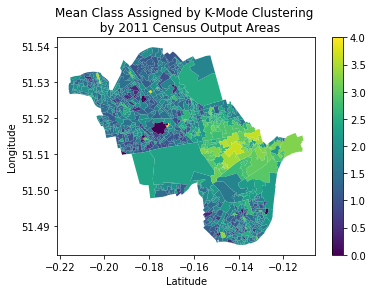

In [17]:
df_places.plot(column = 'Clusters', legend = True)
plt.title('Mean Class Assigned by K-Mode Clustering \n  by 2011 Census Output Areas')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('Ofcom_Exclusion_loc.png', dpi = 600)

In [18]:
centroids = pd.DataFrame(km.cluster_centroids_, columns = Ofcom.columns)
centroids[cont] = centroids[cont].apply(pd.to_numeric)
print(Ofcom[cont].max())
centroids[cont] = centroids[cont].mul(maxi, axis = 1)
print(centroids)

Females aged 100+        1.0
Males aged 80-84         1.0
Mode Income              1.0
Females aged 75-79       1.0
Median Income            1.0
Population aged 65+      1.0
Males aged 100+          1.0
Females                  1.0
Females aged 85-89       1.0
Females aged 95_99       1.0
Females aged 80-84       1.0
Females aged 90-94       1.0
Males                    1.0
Males aged 90-94         1.0
Males aged under 25      1.0
Males aged 65-69         1.0
Females aged 25-44       1.0
Females aged under 25    1.0
Females aged 45-65       1.0
Males aged 65+           1.0
Mean Income              1.0
Males aged 70-74         1.0
Females aged 70-74       1.0
Females aged 65-69       1.0
Large User               1.0
Females aged 65+         1.0
Total households         1.0
Males aged 85-89         1.0
Lower Quartile           1.0
Males aged 95-99         1.0
Males aged 45-65         1.0
Males aged 75-79         1.0
Males aged 25-44         1.0
dtype: float64
  Postcode Target  Large Use

In [25]:
Ofcom_Cluster = Ofcom
Ofcom_Cluster['Clusters'] = clusters
Ofcom_Cluster[cont] = Ofcom_Cluster[cont].apply(pd.to_numeric)
print(Ofcom[cont].max())
Ofcom_Cluster[cont] = Ofcom_Cluster[cont].mul(maxi, axis = 1)

Females aged 100+        1.0
Males aged 80-84         1.0
Mode Income              1.0
Females aged 75-79       1.0
Median Income            1.0
Population aged 65+      1.0
Males aged 100+          1.0
Females                  1.0
Females aged 85-89       1.0
Females aged 95_99       1.0
Females aged 80-84       1.0
Females aged 90-94       1.0
Males                    1.0
Males aged 90-94         1.0
Males aged under 25      1.0
Males aged 65-69         1.0
Females aged 25-44       1.0
Females aged under 25    1.0
Females aged 45-65       1.0
Males aged 65+           1.0
Mean Income              1.0
Males aged 70-74         1.0
Females aged 70-74       1.0
Females aged 65-69       1.0
Large User               1.0
Females aged 65+         1.0
Total households         1.0
Males aged 85-89         1.0
Lower Quartile           1.0
Males aged 95-99         1.0
Males aged 45-65         1.0
Males aged 75-79         1.0
Males aged 25-44         1.0
dtype: float64


In [26]:
wb = Workbook()
wb.save(filename = os.path.join('ofcom_k-modes.xlsx'))

for i in range(0,5):
    df = Ofcom_Cluster.loc[Ofcom_Cluster['Clusters'] == i]
    with pd.ExcelWriter(os.path.join( 'ofcom_k-modes.xlsx'), engine="openpyxl", mode = 'a') as writer:
        df.to_excel(writer, sheet_name = 'cluster %s'%i)
       

In [ ]:
imputed['OA11CD'] = WCC_Mob['OutputArea']

imputed = imputed.dropna(axis = 0)
print(imputed)

In [ ]:
df_places.plot(column = 'Clusters')

In [ ]:
Clusters = pd.DataFrame((clusters+1), columns = ['Clusters'])
print(Clusters)

In [ ]:
Clusters= Clusters.fillna(value = 0)

In [ ]:
Clusters['OA11CD'] = WCC_Mob['OutputArea']
print(Clusters)

In [173]:
DigEx = Clusters.groupby('OA11CD').mean()

In [174]:
df_places = df_places.merge(DigEx, on = ['OA11CD'], how = 'outer')
df_places[['Clusters']] = df_places[['Clusters']].fillna(value = 0)

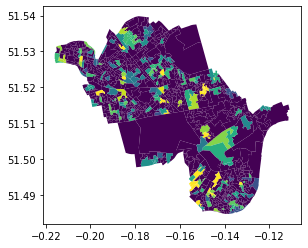

In [175]:
df_places.plot(column = 'Clusters')

In [11]:
WCC_Mob = pd.read_csv(os.path.join(_preprocesseddir, 'WCC_total_final_no_loc.csv')
WCC_Mob['OA11CD']=WCC_Mob['OutputArea']
print(WCC_Mob.head)
DigEx = WCC_Mob.groupby('OA11CD').mean()
DigEx.to_csv('Mob Exclusion OA.csv')

<bound method NDFrame.head of      Target   AGE   S1  Q5a  Q5b  Q5c  Q5d  Q5e  Q5g  Q5h  ...  Q12 Offline  \
0       0.0  65.0  0.0  5.0  5.0  3.0  5.0  5.0  4.0  4.0  ...          3.0   
1       0.0  26.0  0.0  2.0  2.0  3.0  3.0  3.0  2.0  2.0  ...          0.0   
2       0.0  53.0  0.0  4.0  4.0  4.0  4.0  4.0  1.0  4.0  ...          0.0   
3       0.0  44.0  0.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  ...          0.0   
4       1.0  45.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...          0.0   
..      ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...          ...   
956     0.0   NaN  0.0  4.0  4.0  NaN  4.0  1.0  4.0  5.0  ...          1.0   
957     0.0   NaN  1.0  1.0  1.0  NaN  NaN  1.0  3.0  5.0  ...          2.0   
958     0.0   NaN  0.0  4.0  5.0  5.0  5.0  3.0  4.0  5.0  ...          1.0   
959     0.0   NaN  0.0  3.0  3.0  3.0  4.0  1.0  5.0  4.0  ...          0.0   
960     0.0   NaN  0.0  NaN  3.0  NaN  NaN  1.0  NaN  2.0  ...          3.0   

     Usefulness of of

           Target        AGE        S1       Q5a       Q5b       Q5c  \
OA11CD                                                                 
E00023413     0.0  40.250000  0.250000  2.750000  2.750000  2.333333   
E00023415     0.0  43.250000  0.250000  4.000000  3.750000  4.500000   
E00023419     0.0  45.000000  0.500000  1.500000  3.500000  1.000000   
E00023422     0.0  42.833333  0.500000  2.500000  2.500000  2.600000   
E00023423     0.0  40.571429  0.571429  4.000000  4.142857  4.000000   
...           ...        ...       ...       ...       ...       ...   
E00175264     0.0        NaN  1.000000  5.000000  5.000000  4.000000   
E00175265     0.0  32.333333  0.333333  3.333333  4.000000  4.000000   
E00175266     0.0  45.000000  0.625000  2.750000  2.625000  2.375000   
E00175272     0.0  39.666667  0.666667  4.333333  4.333333  4.333333   
E00175278     0.0  39.500000  0.333333  3.000000  2.333333  4.333333   

                Q5d       Q5e       Q5g       Q5h  ...  Q12 Onl

In [9]:
df_places = df_places.merge(DigEx, on = ['OA11CD'], how = 'outer')
print(df_places)

     OBJECTID     OA11CD    LAD11CD    LAD16CD      LAD16NM   Shape__Area  \
0       22724  E00023412  E09000033  E09000033  Westminster  53407.968765   
1       22725  E00023413  E09000033  E09000033  Westminster  49781.967140   
2       22726  E00023414  E09000033  E09000033  Westminster   3406.603691   
3       22727  E00023415  E09000033  E09000033  Westminster  64663.092728   
4       22728  E00023416  E09000033  E09000033  Westminster   3088.101433   
..        ...        ...        ...        ...          ...           ...   
778    169873  E00175275  E09000033  E09000033  Westminster  19791.389435   
779    169874  E00175276  E09000033  E09000033  Westminster  13437.357635   
780    169875  E00175277  E09000033  E09000033  Westminster   8779.767113   
781    169876  E00175278  E09000033  E09000033  Westminster  10355.028786   
782    169877  E00175279  E09000033  E09000033  Westminster  13429.868660   

     Shape__Length                                           geometry  Targ

<Figure size 432x288 with 0 Axes>

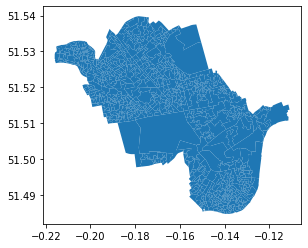

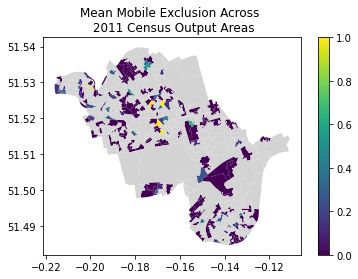

In [10]:
plt.figure()
df_places.plot()
df_places.plot(column = 'Target', legend = True, missing_kwds={
  "color": "lightgrey",
  "label": "Missing values",
})
plt.title('Mean Mobile Exclusion Across \n 2011 Census Output Areas')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('Mobile_Exclusion_loc.png', dpi = 600)

In [ ]:
pd.read_excel()